In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Đọc dữ liệu từ CSV (cần thay đổi đường dẫn phù hợp với máy bạn)
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem có cột "Kết Quả" không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu.")

# Xử lý cột "Kết Quả" (chuyển thành danh sách số)
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# One-hot encoding để chuyển đổi dữ liệu thành dạng nhị phân
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán bộ số cho kỳ tiếp theo
y_pred = model.predict(X_test[-1].reshape(1, -1))

# Chuyển từ one-hot encoding về danh sách số
predicted_numbers = mlb.inverse_transform(y_pred)[0]
predicted_numbers = sorted(predicted_numbers)  # Sắp xếp tăng dần

# In ra kết quả dự đoán
print("Dự đoán bộ số trúng thưởng tiếp theo:", predicted_numbers)


Dự đoán bộ số trúng thưởng tiếp theo: []


In [3]:
print("Dự đoán dạng one-hot:", y_pred)


Dự đoán dạng one-hot: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# BƯỚC 1: ĐỌC DỮ LIỆU
#file_path = r"/mnt/data/T_ng_h_p_d__li_u_Power_6_55.csv"  # Cập nhật đường dẫn
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print("Dữ liệu gốc:")
print(df.head())

# Kiểm tra cột "Kết Quả" có tồn tại không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu!")

# Chuyển đổi cột "Kết Quả" thành danh sách số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# BƯỚC 2: CHUẨN BỊ DỮ LIỆU
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])  # One-Hot Encoding

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BƯỚC 3: HUẤN LUYỆN MÔ HÌNH
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# BƯỚC 4: DỰ ĐOÁN
y_pred_all = model.predict(X_test)

# Tính trung bình các dự đoán
predicted_probabilities = np.mean(y_pred_all, axis=0)

# Chọn 6 số có xác suất cao nhất
predicted_numbers = np.argsort(predicted_probabilities)[-6:]
predicted_numbers.sort()

# Chuyển từ chỉ mục thành số thực tế
predicted_numbers = [num + 1 for num in predicted_numbers]

# KẾT QUẢ
print("Dự đoán bộ số trúng thưởng tiếp theo:", predicted_numbers)


Dữ liệu gốc:
   Ngày Mở Thưởng               Kết Quả  Giải Jackpot 1 (VNĐ)  \
0  T7, 01/02/2025  01 20 34 38 45 47 49           46018127550   
1  T5, 30/01/2025  05 08 24 28 34 52 39           43645177200   
2  T7, 25/01/2025  14 21 40 42 48 51 19           40900773450   
3  T5, 23/01/2025  11 18 22 49 50 51 37           38546257350   
4  T3, 21/01/2025  11 18 22 28 51 52 53           36193391850   

   Giải Jackpot 2 (VNĐ)  
0            5976360700  
1            5712699550  
2            5407765800  
3            5146152900  
4            4884723400  
Dự đoán bộ số trúng thưởng tiếp theo: [14, 22, 23, 24, 25, 55]


In [5]:
# 14 -22 -23 -24 -25 -55


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Đọc dữ liệu từ tệp CSV
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem dữ liệu có cột "Kết Quả" không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu!")

# Chuyển đổi cột "Kết Quả" thành danh sách các số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# One-hot encoding để biểu diễn dữ liệu số trúng thưởng
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán 5 bộ số cho kỳ tiếp theo
predicted_sets = []
for _ in range(5):
    y_pred = model.predict(X_test[-1].reshape(1, -1))

    # Chuyển từ one-hot encoding về danh sách số
    predicted_numbers = mlb.inverse_transform(y_pred)[0]
    predicted_numbers = sorted(predicted_numbers)  # Sắp xếp tăng dần

    predicted_sets.append(predicted_numbers)

# Hiển thị kết quả dự đoán
predicted_sets


[[], [], [], [], []]

In [7]:
import pandas as pd
import numpy as np
from collections import Counter

# Đọc dữ liệu từ tệp CSV
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Chuyển đổi cột "Kết Quả" thành danh sách số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Chọn 20 số xuất hiện nhiều nhất
most_common_numbers = [num for num, _ in number_counts.most_common(20)]

# Tạo 5 bộ số ngẫu nhiên từ danh sách 20 số phổ biến nhất
predicted_sets = [sorted(np.random.choice(most_common_numbers, 6, replace=False)) for _ in range(5)]

# Hiển thị kết quả
print("5 bộ số dự đoán dựa trên tần suất xuất hiện nhiều nhất:")
for i, numbers in enumerate(predicted_sets):
    print(f"Bộ {i+1}: {numbers}")


5 bộ số dự đoán dựa trên tần suất xuất hiện nhiều nhất:
Bộ 1: [10, 18, 20, 21, 48, 51]
Bộ 2: [10, 16, 21, 37, 45, 53]
Bộ 3: [11, 18, 22, 37, 45, 51]
Bộ 4: [10, 11, 22, 37, 39, 53]
Bộ 5: [18, 24, 37, 39, 40, 51]


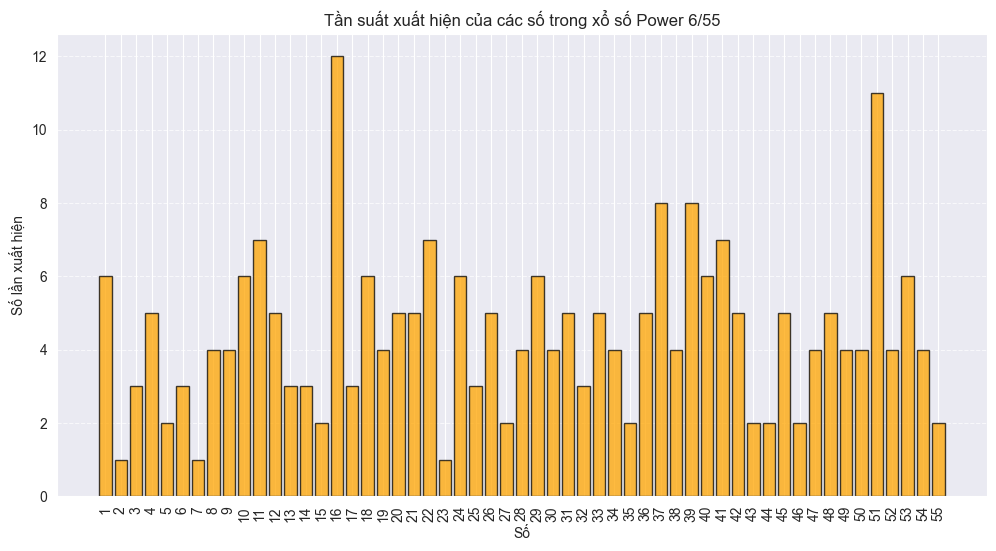

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Đếm tần suất xuất hiện của từng số trong tất cả các kỳ quay
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Chuyển thành DataFrame để dễ hiển thị
freq_df = pd.DataFrame(number_counts.items(), columns=["Số", "Tần suất"]).sort_values(by="Tần suất", ascending=False)

# Xuất dữ liệu ra file CSV để người dùng xem
#csv_path = "/mnt/data/tan_suat_xo_so.csv"
#freq_df.to_csv(csv_path, index=False)
#print(f"Dữ liệu đã được lưu vào: {csv_path}")

# Vẽ biểu đồ tần suất xuất hiện của các số
plt.figure(figsize=(12, 6))
plt.bar(freq_df["Số"], freq_df["Tần suất"], alpha=0.75, color='orange', edgecolor='black')
plt.xlabel("Số")
plt.ylabel("Số lần xuất hiện")
plt.title("Tần suất xuất hiện của các số trong xổ số Power 6/55")
plt.xticks(freq_df["Số"], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


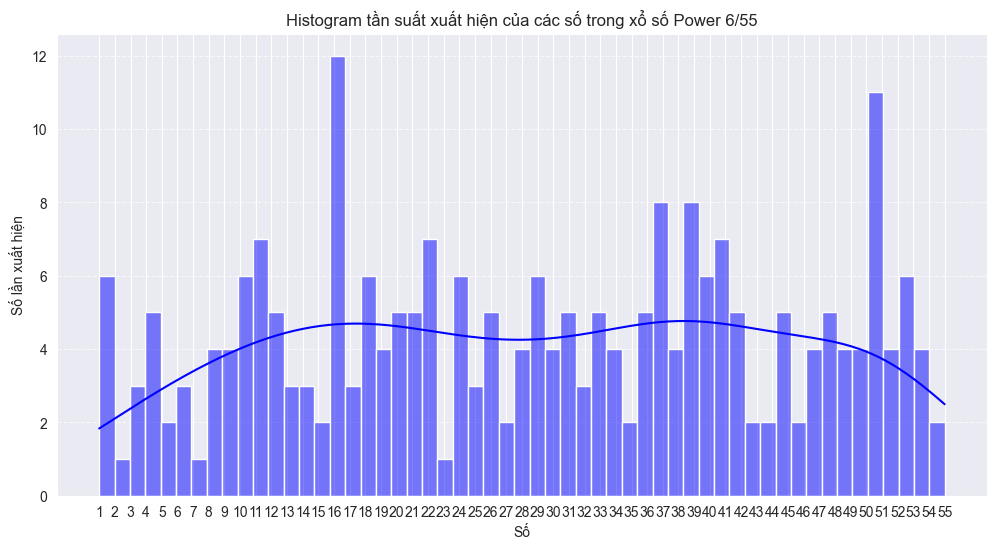

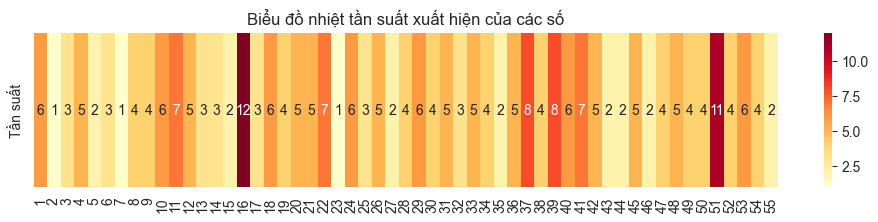

In [9]:
import seaborn as sns

# Vẽ histogram tần suất xuất hiện của các số
plt.figure(figsize=(12, 6))
sns.histplot(all_numbers, bins=55, kde=True, color='blue')
plt.xlabel("Số")
plt.ylabel("Số lần xuất hiện")
plt.title("Histogram tần suất xuất hiện của các số trong xổ số Power 6/55")
plt.xticks(range(1, 56))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Vẽ biểu đồ nhiệt (heatmap) tần suất xuất hiện của các số
heatmap_data = np.zeros((1, 55))
for num, count in number_counts.items():
    heatmap_data[0, num-1] = count

plt.figure(figsize=(12, 2))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, xticklabels=range(1, 56), yticklabels=["Tần suất"])
plt.title("Biểu đồ nhiệt tần suất xuất hiện của các số")
plt.show()


In [11]:
# Lấy 10 số xuất hiện nhiều nhất từ dữ liệu tần suất
top_numbers = [num for num, _ in number_counts.most_common(10)]

# Tạo 10 bộ số dự đoán từ danh sách các số phổ biến nhất
predicted_sets_top = [sorted(np.random.choice(top_numbers, 6, replace=False)) for _ in range(10)]

# Xuất kết quả dự đoán ra DataFrame
predicted_sets_top_df = pd.DataFrame(predicted_sets_top, columns=[f"Số {i+1}" for i in range(6)])
predicted_sets_top_df.index = [f"Bộ {i+1}" for i in range(10)]

# Xuất dữ liệu ra file CSV để tải xuống
csv_top_path = "D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv"
predicted_sets_top_df.to_csv(csv_top_path, index=True)

# Hiển thị kết quả
predicted_sets_top_df, csv_top_path


(       Số 1  Số 2  Số 3  Số 4  Số 5  Số 6
 Bộ 1      1    11    39    40    41    51
 Bộ 2     16    22    24    37    39    40
 Bộ 3     11    22    24    39    41    51
 Bộ 4     16    22    24    39    41    51
 Bộ 5      1    16    22    37    41    51
 Bộ 6     11    22    37    39    40    51
 Bộ 7      1    16    22    24    37    41
 Bộ 8      1    11    39    40    41    51
 Bộ 9      1    16    22    24    39    51
 Bộ 10    16    24    37    39    41    51,
 'D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv')

In [14]:
# Reload required libraries since execution state was reset
import pandas as pd
import numpy as np
from collections import Counter

# Load the dataset again+
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Convert "Kết Quả" column into a list of numbers
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# Count frequency of each number in all draws
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Select the 10 most frequently appearing numbers
top_numbers = [num for num, _ in number_counts.most_common(10)]

# Generate 10 sets of numbers using the most common ones
predicted_sets_top = [sorted(np.random.choice(top_numbers, 6, replace=False)) for _ in range(10)]

# Convert to DataFrame for better visualization
predicted_sets_top_df = pd.DataFrame(predicted_sets_top, columns=[f"Số {i+1}" for i in range(6)])
predicted_sets_top_df.index = [f"Bộ {i+1}" for i in range(10)]

# Save the predicted sets to a CSV file
csv_top_path = "D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv"
predicted_sets_top_df.to_csv(csv_top_path, index=True)

# Display results
predicted_sets_top_df, csv_top_path


(       Số 1  Số 2  Số 3  Số 4  Số 5  Số 6
 Bộ 1     11    22    24    37    39    40
 Bộ 2      1    11    24    37    40    51
 Bộ 3      1    16    22    39    40    51
 Bộ 4     11    16    22    24    40    41
 Bộ 5     16    37    39    40    41    51
 Bộ 6     11    24    39    40    41    51
 Bộ 7      1    16    22    24    39    40
 Bộ 8      1    37    39    40    41    51
 Bộ 9      1    11    22    37    39    51
 Bộ 10    16    37    39    40    41    51,
 'D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv')

In [15]:
# sxkt 6/45


In [23]:
from pywin.framework.toolmenu import tools
import pandas as pd

# Đọc file CSV đã tạo trước đó
csv_file_existing = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_6_45.csv"  # Đường dẫn file CSV đã có
df_existing = pd.read_csv(csv_file_existing)

# Chuẩn bị dữ liệu
data = [
    ["2025-01-31", [2, 15, 16, 32, 42, 45], 139780079500],
    ["2025-01-26", [5, 8, 9, 11, 20, 29], 126005043500],
    ["2025-01-24", [1, 7, 11, 22, 31, 34], 113638180500],
    ["2025-01-22", [3, 21, 26, 29, 32, 33], 100732063000],
    ["2025-01-19", [5, 6, 10, 19, 32, 38], 88694200500],
    ["2025-01-17", [2, 12, 22, 31, 34, 35], 79711876500],
    ["2025-01-15", [2, 6, 8, 10, 23, 33], 70643696000],
    ["2025-01-12", [2, 9, 12, 14, 41, 44], 64648452500],
    ["2025-01-10", [2, 4, 8, 28, 42, 44], 60864897000],
    ["2025-01-08", [2, 3, 17, 33, 37, 38], 57135772500],
    ["2025-01-05", [2, 7, 15, 37, 41, 42], 53382262500],
    ["2025-01-03", [6, 12, 21, 27, 34, 41], 50082418000],
    ["2025-01-01", [14, 20, 25, 28, 36, 40], 47338930500],
    ["2024-12-29", [5, 8, 19, 31, 34, 43], 44067745500],
    ["2024-12-27", [1, 10, 13, 24, 25, 33], 41293911500],
    ["2024-12-25", [8, 13, 20, 25, 28, 39], 38615657500],
    ["2024-12-22", [15, 16, 24, 27, 31, 44], 36004612500],
    ["2024-12-20", [6, 9, 12, 21, 28, 33], 33371997000],
    ["2024-12-18", [3, 7, 12, 16, 26, 34], 31310806000],
    ["2024-12-15", [1, 10, 20, 22, 23, 36], 29082832000],
    ["2024-12-13", [3, 7, 29, 36, 37, 44], 26867060000],
    ["2024-12-11", [2, 10, 17, 23, 29, 33], 24777935000],
    ["2024-12-08", [1, 13, 24, 26, 27, 37], 22725738500],
    ["2024-12-06", [8, 14, 18, 26, 34, 42], 20515681000],
    ["2024-12-04", [7, 14, 19, 24, 34, 36], 18798154500],
    ["2024-12-01", [15, 17, 25, 29, 33, 35], 17057985500],
    ["2024-11-29", [12, 15, 33, 35, 37, 45], 15190794500],
    ["2024-11-27", [6, 21, 24, 31, 42, 44], 13588912500],
    ["2024-11-24", [5, 14, 15, 21, 33, 36], 16930514500],
    ["2024-11-22", [1, 14, 15, 19, 38, 40], 15156338000],
    ["2024-11-20", [4, 16, 24, 29, 31, 37], 13418918000],
    ["2024-11-17", [11, 17, 29, 31, 38, 42], 13537887500],
    ["2024-11-15", [8, 13, 31, 36, 37, 40], 45581631000],
    ["2024-11-13", [3, 23, 28, 35, 39, 42], 42456900000],
    ["2024-11-10", [3, 7, 11, 12, 13, 40], 39606306500],
    ["2024-11-08", [11, 15, 18, 27, 34, 37], 37004206500],
    ["2024-11-06", [1, 2, 3, 11, 25, 37], 34366173000],
    ["2024-11-03", [1, 4, 5, 16, 20, 22], 31646618500],
    ["2024-11-01", [20, 22, 23, 32, 35, 40], 29358428000],
    ["2024-10-30", [4, 13, 20, 29, 32, 37], 26810933500],
    ["2024-10-27", [18, 21, 28, 29, 33, 45], 24626576000],
    ["2024-10-25", [3, 10, 31, 32, 34, 40], 22669162000],
    ["2024-10-23", [22, 27, 28, 31, 37, 44], 20513466500],
    ["2024-10-20", [6, 23, 24, 25, 26, 34], 18553176000],
    ["2024-10-18", [13, 19, 20, 22, 24, 37], 16591982500],
    ["2024-10-16", [4, 14, 19, 23, 24, 37], 14890252500],
    ["2024-10-13", [7, 10, 13, 17, 21, 45], 13369031000],
    ["2024-10-11", [11, 19, 26, 28, 29, 43], 13354346000],
    ["2024-10-09", [14, 18, 20, 22, 34, 45], 13438081500],
    ["2024-10-06", [7, 14, 33, 36, 42, 43], 16416912500],
    ["2024-10-04", [8, 10, 21, 32, 39, 44], 14724040000],
    ["2024-10-02", [5, 6, 11, 23, 31, 36], 13365690500],
    ["2024-09-29", [3, 7, 16, 17, 41, 42], 27222998500],
    ["2024-09-27", [1, 6, 18, 25, 39, 44], 25263520500],
    ["2024-09-25", [10, 23, 25, 27, 31, 37], 23337824500],
    ["2024-09-22", [20, 23, 28, 36, 40, 42], 21434713500],
    ["2024-09-20", [13, 14, 19, 20, 30, 33], 19410440000],
    ["2024-09-18", [4, 8, 27, 28, 35, 36], 17855427500],
    ["2024-09-15", [3, 11, 28, 32, 33, 35], 16097503500],
    ["2024-09-13", [6, 12, 27, 34, 41, 42], 14538458000],
    ["2024-09-11", [6, 11, 19, 23, 34, 37], 13176145000],
    ["2024-09-08", [3, 8, 10, 26, 34, 37], 28144908000],
    ["2024-09-06", [5, 25, 28, 32, 36, 41], 26383657500],
    ["2024-09-04", [2, 7, 15, 18, 24, 33], 24441923000],
    ["2024-09-01", [30, 31, 33, 38, 42, 43], 22540554500],
    ["2024-08-30", [2, 15, 19, 26, 34, 36], 20718469000],
    ["2024-08-28", [4, 5, 17, 25, 39, 41], 18798951500],
    ["2024-08-25", [6, 10, 15, 17, 40, 42], 17010599000],
    ["2024-08-23", [7, 13, 26, 28, 35, 41], 15205954500],
    ["2024-08-21", [7, 8, 9, 15, 22, 30], 13466623500],
    ["2024-08-18", [4, 13, 28, 33, 35, 38], 15056391500],
    ["2024-08-16", [16, 22, 23, 30, 34, 41], 13447188500],
    ["2024-08-14", [1, 6, 9, 21, 43, 44], 17116579000],
    ["2024-08-11", [17, 18, 19, 33, 35, 37], 15199287000],
    ["2024-08-09", [6, 14, 15, 24, 26, 39], 13483702000],
    ["2024-08-07", [11, 19, 22, 29, 40, 44], 47395426500],
    ["2024-08-04", [1, 4, 16, 18, 20, 32], 42127575500],
    ["2024-08-02", [9, 14, 19, 34, 37, 41], 37052164000],
    ["2024-07-31", [2, 4, 12, 16, 18, 42], 33278054500],
    ["2024-07-28", [1, 13, 21, 25, 31, 39], 31100674000],
    ["2024-07-26", [18, 20, 28, 31, 39, 45], 28738175000],
    ["2024-07-24", [7, 8, 20, 27, 32, 34], 26628545500],
    ["2024-07-21", [9, 10, 23, 25, 28, 38], 24380999000],
    ["2024-07-19", [1, 10, 20, 25, 34, 35], 22544117000],
    ["2024-07-17", [9, 10, 11, 16, 21, 30], 20516749500],
    ["2024-07-14", [9, 18, 33, 37, 38, 43], 18676058500],
    ["2024-07-12", [11, 17, 25, 26, 28, 29], 17018319000],
    ["2024-07-10", [23, 24, 36, 37, 40, 45], 15294625500],
    ["2024-07-07", [4, 8, 22, 23, 26, 45], 13539605500],
    ["2024-07-05", [4, 23, 33, 38, 40, 44], 20185430500],
    ["2024-07-03", [11, 18, 24, 34, 38, 43], 18339607000],
    ["2024-06-30", [5, 23, 25, 28, 30, 43], 16735323500],
    ["2024-06-28", [4, 6, 16, 32, 41, 44], 15172247000],
    ["2024-06-26", [8, 10, 29, 30, 33, 40], 13538712500],
    ["2024-06-23", [9, 11, 19, 29, 31, 44], 19775097000],
    ["2024-06-21", [3, 7, 11, 16, 19, 35], 18108742500],
    ["2024-06-19", [8, 12, 17, 23, 26, 27], 16583396500],
    ["2024-06-16", [3, 16, 17, 18, 25, 37], 15109366500],
    ["2024-06-14", [10, 24, 25, 26, 30, 41], 13410838000],
    ["2024-06-12", [1, 2, 8, 13, 26, 34], 41467525000],
    ["2024-06-09", [4, 5, 28, 32, 37, 42], 36917178000],
    ["2024-06-07", [15, 19, 24, 25, 27, 39], 32584730500],
    ["2024-06-05", [11, 25, 28, 33, 34, 45], 28609380500],
    ["2024-06-02", [2, 7, 13, 23, 25, 45], 24397894000],
    ["2024-05-31", [4, 8, 15, 23, 31, 40], 22426387500],
    ["2024-05-29", [4, 21, 25, 27, 35, 39], 20570219000],
    ["2024-05-26", [4, 9, 11, 14, 19, 27], 18585169500],
    ["2024-05-24", [2, 14, 15, 17, 23, 40], 16892502000],
    ["2024-05-22", [2, 3, 10, 22, 41, 43], 15046246500],
    ["2024-05-19", [5, 19, 25, 35, 37, 39], 13304746000],
    ["2024-05-17", [8, 22, 27, 29, 39, 43], 69796747000],
    ["2024-05-15", [3, 11, 13, 21, 24, 34], 63000355500],
    ["2024-05-12", [3, 5, 6, 9, 32, 45], 56872464500],
    ["2024-05-10", [12, 13, 31, 38, 42, 43], 53511343500],
    ["2024-05-08", [2, 10, 13, 22, 30, 34], 50378948500],
    ["2024-05-05", [10, 12, 14, 16, 21, 39], 16892502000],
    ["2024-05-03", [1, 13, 14, 21, 27, 43], 44647657500],
    ["2024-05-01", [7, 9, 17, 20, 25, 29], 41717518000],
    ["2024-04-28", [1, 13, 14, 22, 23, 37], 39429278000],
    ["2024-04-26", [2, 3, 25, 34, 35, 38], 36854769000],
    ["2024-04-24", [7, 21, 30, 33, 38, 39], 33913442500],
    ["2024-04-21", [7, 21, 36, 38, 40, 45], 31115578500],
    ["2024-04-19", [2, 3, 20, 21, 32, 33], 28496335000],
    ["2024-04-17", [9, 16, 26, 27, 32, 41], 25900366000],
    ["2024-04-14", [7, 12, 16, 29, 42, 45], 23427026500],
    ["2024-04-12", [6, 17, 18, 26, 43, 45], 21014657500],
    ["2024-04-10", [2, 10, 30, 33, 34, 40], 18500289500],
    ["2024-04-07", [3, 11, 15, 17, 24, 35], 15945247500],
    ["2024-04-05", [14, 18, 22, 29, 36, 37], 13802587000],
    ["2024-04-03", [7, 11, 14, 22, 29, 34], 15715733000],
    ["2024-04-01", [5, 12, 13, 17, 40, 41], 13833689000],
    ["2024-03-29", [4, 7, 25, 34, 35, 38], 24266327500],
    ["2024-03-27", [6, 29, 31, 35, 42, 44], 21920780500],
    ["2024-03-24", [1, 14, 22, 28, 32, 42], 19560299000],
    ["2024-03-22", [5, 6, 11, 20, 24, 45], 17383898500],
    ["2024-03-20", [8, 14, 26, 28, 43, 45], 15554264500],
    ["2024-03-17", [1, 3, 5, 26, 30, 42], 13712050500],
    ["2024-03-15", [9, 11, 16, 29, 31, 33], 25152452500],
    ["2024-03-13", [1, 13, 25, 30, 34, 40], 23424929500],
    ["2024-03-10", [4, 12, 19, 23, 36, 41], 20891137000],
    ["2024-03-08", [2, 26, 28, 40, 41, 45], 19076425000],
    ["2024-03-06", [11, 15, 34, 39, 41, 43], 16998337500],
    ["2024-03-03", [3, 10, 17, 20, 22, 27], 15089165000],
    ["2024-03-01", [20, 22, 24, 26, 28, 37], 13505728500],
    ["2024-02-28", [1, 10, 21, 25, 32, 39], 13552229000],
    ["2024-02-25", [5, 7, 10, 12, 15, 26], 13116681000],
    ["2024-02-23", [4, 17, 19, 27, 28, 36], 55896580500],
    ["2024-02-21", [2, 8, 14, 19, 24, 42], 50440757500],
    ["2024-02-18", [5, 19, 20, 21, 24, 40], 45166929000],
    ["2024-02-16", [6, 10, 16, 20, 40, 42], 40113943000],
    ["2024-02-14", [8, 9, 11, 12, 40, 44], 35490259000],
    ["2024-02-11", [7, 18, 31, 33, 35, 41], 29001752500],
    ["2024-02-07", [17, 21, 24, 25, 39, 42], 26679187500],
    ["2024-02-04", [9, 15, 21, 29, 33, 39], 23589111000],
    ["2024-02-02", [1, 15, 29, 31, 32, 34], 21772445000],
    ["2024-01-31", [9, 11, 15, 35, 38, 41], 19563269500],
    ["2024-01-28", [3, 23, 25, 29, 36, 41], 17814565000],
    ["2024-01-26", [8, 19, 22, 27, 31, 35], 16171568000],
    ["2024-01-24", [7, 27, 30, 36, 39, 45], 14729627500],
    ["2024-01-21", [11, 20, 22, 23, 26, 31], 13390683500],
    ["2024-01-19", [8, 15, 20, 24, 43, 44], 48351151000],
    ["2024-01-17", [14, 19, 21, 36, 43, 44], 43773001000],
    ["2024-01-14", [2, 8, 19, 20, 24, 42], 39228755000],
    ["2024-01-12", [10, 11, 20, 27, 39, 43], 35243823000],
    ["2024-01-10", [10, 12, 18, 19, 29, 43], 31561758500],
    ["2024-01-07", [3, 4, 15, 18, 36, 45], 27818430500],
    ["2024-01-05", [9, 16, 29, 31, 33, 42], 24663684500],
    ["2024-01-03", [9, 14, 19, 20, 29, 40], 22767710000],
    ["2023-12-31", [13, 14, 23, 25, 34, 44], 21072294500],
    ["2023-12-29", [16, 20, 22, 35, 37, 39], 19275775000],
    ["2023-12-27", [8, 16, 23, 34, 36, 39], 17680939500],
    ["2023-12-24", [1, 2, 5, 24, 40, 43], 16190373500],
    ["2023-12-22", [2, 12, 14, 16, 34, 38], 14542048500],
    ["2023-12-20", [5, 15, 16, 21, 22, 32], 13317089500],
    ["2023-12-17", [3, 7, 18, 20, 31, 33], 32398072500],
    ["2023-12-15", [1, 5, 10, 11, 20, 40], 28627080000],
    ["2023-12-13", [3, 7, 11, 20, 28, 44], 25402013000],
    ["2023-12-10", [9, 10, 11, 17, 41, 44], 23299498500],
    ["2023-12-08", [11, 15, 16, 17, 42, 43], 21503268500],
    ["2023-12-06", [18, 19, 20, 29, 41, 42], 19757570500],
    ["2023-12-03", [12, 14, 16, 21, 29, 32], 17845608000],
    ["2023-12-01", [5, 10, 14, 21, 27, 32], 16300633500],
    ["2023-11-29", [9, 22, 24, 32, 38, 39], 14760004000],
    ["2023-11-26", [4, 6, 15, 23, 25, 36], 13191038000],
    ["2023-11-24", [5, 18, 22, 34, 41, 45], 96243094000],
    ["2023-11-22", [15, 18, 20, 23, 37, 39], 87610138500],
    ["2023-11-19", [1, 3, 19, 20, 26, 34], 79611327000],
    ["2023-11-17", [16, 20, 25, 26, 36, 41], 71959468000],
    ["2023-11-15", [2, 3, 12, 16, 30, 37], 64531119500],
    ["2023-11-12", [2, 4, 10, 15, 27, 31], 57741013000],
    ["2023-11-10", [1, 4, 10, 13, 14, 44], 52013662000],
    ["2023-11-08", [7, 20, 23, 27, 31, 33], 46370024000],
    ["2023-11-05", [1, 13, 16, 18, 23, 25], 41347137000],
    
]
# Chuyển đổi dữ liệu mới thành DataFrame
df_new = pd.DataFrame(data, columns=["Date", "Winning Numbers", "Jackpot Amount"])

# Chuẩn hóa các số trúng thành chuỗi để nhất quán với dữ liệu cũ
df_new["Winning Numbers"] = df_new["Winning Numbers"].apply(lambda x: " ".join(map(str, x)))

# Hợp nhất dữ liệu mới và dữ liệu cũ
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Sắp xếp theo ngày giảm dần
df_combined.sort_values(by="Date", ascending=False, inplace=True)

# Xuất ra file CSV mới
csv_combined_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

df_combined.to_csv(csv_combined_filename, index=False, encoding="utf-8")

# Hiển thị DataFrame cập nhật


print(df_combined.head())  # Xem 5 dòng đầu tiên của DataFrame


# Trả về đường dẫn file CSV mới
csv_combined_filename


           Date   Winning Numbers Jackpot Amount
0    2025-01-31  2 15 16 32 42 45   139780079500
193  2025-01-31  2 15 16 32 42 45   139780079500
194  2025-01-26    5 8 9 11 20 29   126005043500
1    2025-01-26    5 8 9 11 20 29   126005043500
195  2025-01-24   1 7 11 22 31 34   113638180500


'H:\\My Drive\\02. Coursera\\04.IBM_Generative_A_ Engineering_Professional_Certificate\\07.Python_in_data_analyst\\IBM_Python_in_data_analyst\\Machine_Learning_With_Python\\predictpower\\lottery_results_combined.csv'

In [24]:
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

In [25]:
df.head()

,Ngày Mở Thưởng,Kết Quả,Giải Jackpot 1 (VNĐ),Giải Jackpot 2 (VNĐ)
0,"T7, 01/02/2025",01 20 34 38 45 47 49,46018127550,5976360700
1,"T5, 30/01/2025",05 08 24 28 34 52 39,43645177200,5712699550
2,"T7, 25/01/2025",14 21 40 42 48 51 19,40900773450,5407765800
3,"T5, 23/01/2025",11 18 22 49 50 51 37,38546257350,5146152900
4,"T3, 21/01/2025",11 18 22 28 51 52 53,36193391850,4884723400


In [29]:
pip install pandas numpy tensorflow scikit-learn

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.1/390.3 MB 11.8 MB/s eta 0:00:33
    --------------------------------------- 5.2/390.3 MB 14.5 MB/s eta 0:00:27
    --------------------------------------- 9.4/390.3 MB 16.8 MB/s eta 0:00:23
   - -------------------------------------- 16.0/390.3 MB 20.1 MB/s eta 0:00:19
   -- ------------------------------------- 23.9/390.3 MB 24.0 MB/s eta 0:00:16
   --- ------------------------------------ 34.3/390.3 MB 28.3 MB/s eta 0:00:13
   ---- ----------------------------------- 48.0/390.3 MB 34.3 MB/s eta 0:00:10
   ------ --------------------------------- 62.7/390.3 MB 38.8 MB/s eta 0:00:09
   ------- -------------------------------- 72.4/390.3 MB 40.1 MB/s eta 0:00:08
   ------- -------------------------------- 76.8/390.3 MB 38.0 MB/s eta 0:00:09
   -------- ------------------------------- 80.2/390.3 MB 36.0 MB/s eta 0:00:09
   -------- ------------------------------- 83.9/390

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\keras\\src\\backend\\jax\\export.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

import os

csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

# Kiểm tra file tồn tại
if not os.path.exists(csv_filename):
    print(f"❌ Lỗi: File không tồn tại tại đường dẫn: {csv_filename}")
else:
    print("✅ File tồn tại, tiếp tục xử lý...")
    
df = pd.read_csv(csv_filename)

# Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# Lấy danh sách các số đã xuất hiện
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]

# Tạo dataset bằng cách lấy tần suất xuất hiện của từng số
counter = Counter(all_numbers)
all_unique_numbers = sorted(counter.keys())
num_features = len(all_unique_numbers)

# Tạo dữ liệu huấn luyện
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Dãy số của kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Dãy số của kỳ kế tiếp
    
    # Biểu diễn dãy số bằng tần suất
    freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32)
    
    # Gán nhãn là dãy số kỳ tiếp theo
    label = np.zeros(num_features)
    for num in next_numbers:
        label[all_unique_numbers.index(num)] = 1  # Đánh dấu các số xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_features, activation='sigmoid')  # Dự đoán xác suất từng số xuất hiện
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# Dự đoán cho kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# Lấy 6 số có xác suất cao nhất
predicted_numbers = [all_unique_numbers[i] for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

# In kết quả
print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)


✅ File tồn tại, tiếp tục xử lý...
Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0190 - loss: 0.6909   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6822 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6737 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6654 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6574 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6419 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0092 - loss: 0.6344     
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0186 - loss: 0.6272 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6133 
Epoch 12/100
25/25 ━━━━━━━

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# 📌 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

try:
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"⚠️ Lỗi: Không tìm thấy file '{csv_filename}'. Hãy kiểm tra lại đường dẫn.")
    exit()

# 📌 Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📌 Lấy danh sách tất cả các số đã xuất hiện
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]

# 📌 Đếm tần suất xuất hiện của từng số
counter = Counter(all_numbers)
all_unique_numbers = sorted(counter.keys())  # Danh sách các số từ 1 đến 45
num_features = len(all_unique_numbers)  # Tổng số đặc trưng

# 📌 Chuẩn bị dữ liệu huấn luyện
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Số trúng thưởng kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Số trúng thưởng kỳ tiếp theo
    
    # Biểu diễn tần suất xuất hiện của từng số
    freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32)
    
    # Biểu diễn số trúng thưởng của kỳ tiếp theo (one-hot encoding)
    label = np.zeros(num_features)
    for num in next_numbers:
        label[all_unique_numbers.index(num)] = 1  # Đánh dấu số đã xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# 📌 Chuẩn hóa dữ liệu đầu vào
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 📌 Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = keras.Sequential([
    keras.Input(shape=(num_features,)),  # ✅ Sử dụng keras.Input() để tránh cảnh báo
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_features, activation='sigmoid')  # Dự đoán xác suất xuất hiện
])

# 📌 Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 📌 Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# 📌 Dự đoán kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# 📌 Lấy 6 số có xác suất cao nhất
predicted_numbers = [all_unique_numbers[i] for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

# 📌 In kết quả dự đoán
print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0314 - loss: 0.6909   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6821 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0031 - loss: 0.6736     
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0644 - loss: 0.6654     
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0035 - loss: 0.6573     
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 4.0448e-04 - loss: 0.6418 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0038 - loss: 0.6344     
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6272 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6132 
Epoch 12/1

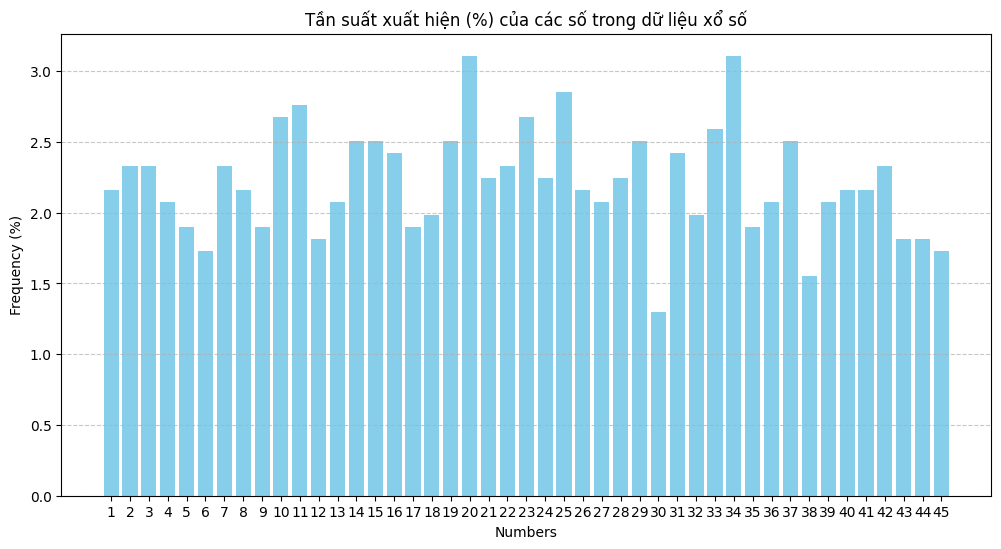

    Number  Frequency (%)
0       20       3.108808
1       34       3.108808
2       25       2.849741
3       11       2.763385
4       10       2.677029
5       23       2.677029
6       33       2.590674
7       15       2.504318
8       29       2.504318
9       19       2.504318
10      14       2.504318
11      37       2.504318
12      16       2.417962
13      31       2.417962
14       2       2.331606
15      42       2.331606
16       7       2.331606
17      22       2.331606
18       3       2.331606
19      21       2.245250
20      28       2.245250
21      24       2.245250
22       8       2.158895
23       1       2.158895
24      26       2.158895
25      41       2.158895
26      40       2.158895
27       4       2.072539
28      27       2.072539
29      36       2.072539
30      13       2.072539
31      39       2.072539
32      32       1.986183
33      18       1.986183
34       5       1.899827
35       9       1.899827
36      35       1.899827
37      17  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 🗂 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# 🔄 Chuyển đổi cột "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📊 Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]
counter = Counter(all_numbers)

# 📈 Tính toán phần trăm xuất hiện
total_numbers = sum(counter.values())  # Tổng số lần xuất hiện
percentage_freq = {num: (count / total_numbers) * 100 for num, count in counter.items()}

# 🔍 Sắp xếp theo tần suất giảm dần
sorted_freq = dict(sorted(percentage_freq.items(), key=lambda item: item[1], reverse=True))

# 🎨 Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))
plt.bar(sorted_freq.keys(), sorted_freq.values(), color='skyblue')
plt.xlabel("Numbers")
plt.ylabel("Frequency (%)")
plt.title("Tần suất xuất hiện (%) của các số trong dữ liệu xổ số")
plt.xticks(range(1, 46))  # Vì xổ số 6/45 có các số từ 1 đến 45
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📋 Hiển thị kết quả dưới dạng bảng
df_freq = pd.DataFrame(list(sorted_freq.items()), columns=["Number", "Frequency (%)"])

print(df_freq)


In [11]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

# 🗂 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# 🔄 Chuyển đổi cột "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📊 Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]
counter = Counter(all_numbers)

# 📈 Lấy 12 số có tần suất cao nhất
top_12_numbers = [num for num, _ in counter.most_common(10)]
print("📊 12 số có tần suất cao nhất:", top_12_numbers)

# 🔢 Tạo tất cả các tổ hợp có thể từ 12 số (chọn 6 số trên 12 số)
all_combinations = list(itertools.combinations(top_12_numbers, 6))
print(f"🔢 Có tổng cộng {len(all_combinations)} bộ số có thể từ 12 số này.")

# 📋 Chuyển danh sách tổ hợp thành DataFrame
df_combinations = pd.DataFrame(all_combinations, columns=[f"Number_{i+1}" for i in range(6)])

# 📌 Chuyển đổi dữ liệu về dạng phù hợp cho mạng nơ-ron
num_features = 45  # Vì xổ số 6/45 có các số từ 1 đến 45
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Dãy số của kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Dãy số của kỳ tiếp theo
    
    # Biểu diễn dãy số bằng tần suất
    freq_vector = np.array([counter[num] for num in range(1, num_features + 1)], dtype=np.float32)
    
    # Gán nhãn là dãy số kỳ tiếp theo
    label = np.zeros(num_features)
    for num in next_numbers:
        label[num - 1] = 1  # Đánh dấu các số xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# 📊 Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 🧠 Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(num_features, activation='sigmoid')  # Dự đoán xác suất từng số xuất hiện
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔥 Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# 🧠 Dự đoán cho kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in range(1, num_features + 1)], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# 🎯 Lấy 6 số có xác suất cao nhất
predicted_numbers = [i + 1 for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)

# 📋 Hiển thị danh sách tổ hợp có thể lên DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Lottery Number Combinations", dataframe=df_combinations)


📊 12 số có tần suất cao nhất: [20, 34, 25, 11, 10, 23, 33, 15, 29, 19]
🔢 Có tổng cộng 210 bộ số có thể từ 12 số này.
Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0464 - loss: 0.6909
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0753 - loss: 0.6822     
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0371 - loss: 0.6737 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6654 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0911 - loss: 0.6573 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1009 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0933 - loss: 0.6418 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1008 - loss: 0.6344 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0909 - loss: 0.6271 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1196 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0773 - loss: 0.6132     
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

ModuleNotFoundError: No module named 'ace_tools'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# Trích xuất năm từ ngày
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Tính tần suất xuất hiện của từng số theo từng năm
number_trend = {}
for year in df["Year"].unique():
    yearly_data = df[df["Year"] == year]
    numbers = [num for sublist in yearly_data["Winning Numbers"] for num in sublist]
    counter = Counter(numbers)
    number_trend[year] = counter

# Chuyển đổi thành DataFrame
df_trend = pd.DataFrame.from_dict(number_trend, orient='index').fillna(0)
df_trend = df_trend.sort_index()

# Chuẩn hóa dữ liệu
df_trend_scaled = MinMaxScaler().fit_transform(df_trend)

# Xây dựng mô hình hồi quy để dự đoán xu hướng
def predict_next_year_numbers(df_trend):
    predicted_numbers = {}
    for number in df_trend.columns:
        x = np.array(df_trend.index).reshape(-1, 1)  # Năm
        y = df_trend[number].values  # Tần suất xuất hiện
        model = LinearRegression()
        model.fit(x, y)
        predicted_freq = model.predict([[df_trend.index[-1] + 1]])[0]
        predicted_numbers[number] = predicted_freq
    
    # Lấy 12 số có xu hướng tăng mạnh nhất
    top_numbers = sorted(predicted_numbers, key=predicted_numbers.get, reverse=True)[:12]
    return top_numbers

# Dự đoán các số có xu hướng tăng mạnh nhất
top_12_numbers = predict_next_year_numbers(df_trend)
print("📊 12 số có xu hướng tăng mạnh nhất:", top_12_numbers)

# Tạo tất cả các tổ hợp có thể từ 12 số trên
from itertools import combinations
df_combinations = pd.DataFrame(list(combinations(top_12_numbers, 6)), columns=["Num1", "Num2", "Num3", "Num4", "Num5", "Num6"])

# Hiển thị danh sách tổ hợp có thể lên DataFrame
print(df_combinations.head())  # Xem trước một số dòng


📊 12 số có xu hướng tăng mạnh nhất: [2, 33, 8, 42, 34, 29, 28, 11, 6, 19, 37, 31]
   Num1  Num2  Num3  Num4  Num5  Num6
0     2    33     8    42    34    29
1     2    33     8    42    34    28
2     2    33     8    42    34    11
3     2    33     8    42    34     6
4     2    33     8    42    34    19


C:\Users\Admin\AppData\Local\Temp\ipykernel_24316\3863500951.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Year"] = pd.to_datetime(df["Date"]).dt.year
